In [149]:
import tensorwatch as tw
import pandas as pd
import os
import matplotlib.pyplot as plt

In [150]:
class csv_files:
    
    def __init__(self, name, dir):
        parts = name.split("_")
        
        path = dir + "/" + name
        if not os.path.isdir(path):
            self.valid  = False
            return
            
        if not os.path.isfile(path + "/results.csv"):
            self.valid  = False
            return
        
        self.valid = True
        self.model = parts[0]
        self.dataset = parts[1]
        
            
        self.accumulation = ""
        
        i = 2
        while not "sparse" in parts[i] and not "dense" in parts[i]:
            self.accumulation = self.accumulation + parts[i] + ","
            i = i + 1
        
        self.accumulation = self.accumulation[:-1]
        
        self.sparsity = parts[i]
        i = i +1
        
        if i < len(parts) and ("baseline" in parts[i] or "chunk" in parts[i]):
            parts[i] = parts[i].replace("chunks", "chunk")
            self.chunkiness = parts[i]
            i = i + 1
        else:
            self.chunkiness = "chunk8"

        if i < len(parts) :
            self.batch = int(parts[i][1:])
            i = i + 1
        else:
            self.batch = 128
            
        self.path = path + "/results.csv"
                
    def __str__(self):
        if self.valid:
            str = f"model: {self.model}, dataset: {self.dataset}, accumulation: {self.accumulation}, sparsity: {self.sparsity}, batch: {self.batch}, chunks: {self.chunkiness}"
            return str
        else:
            return "invalid"
                             
            
    def get_data(self, col):
        df = pd.read_csv(self.path)
        df["training loss"].to_numpy
        data = df[col].to_numpy()
        return data
            
        

def compare_function(file, model = None, dataset = None, accumulation = None, batch = None, chunkiness = None, sparsity = None):
    if model is not None:
        if not file.model == model:
            return False
    
    if dataset is not None:
        if not file.dataset == dataset:
            return False
    
    
    if accumulation is not None:
        if not file.accumulation == accumulation:
            return False

    if sparsity is not None:
        if not file.sparsity == sparsity:
            return False
        
        
    if batch is not None:
        if not file.batch == batch:
            return False
        
    
    if chunkiness is not None:
        if not file.chunkiness == chunkiness:
            return False
        
    return True

def get_title(model = None, dataset = None, accumulation = None, batch = None, chunkiness = None, sparsity = None):
    title = ""
    if model is not None:
        title = title + f"model: {model}, " 
    
    if dataset is not None:
        title = title + f"dataset: {dataset}, " 

    if accumulation is not None:
        title = title + f"accumulation: {accumulation}, " 
        
    if sparsity is not None:
        title = title + f"sparsity: {sparsity}, " 
        
    if batch is not None:
        title = title + f"batch: {batch}, " 
        
    if chunkiness is not None:
        title = title + f"chunkiness: {chunkiness}, " 
        
    return title[:-2]



        
def compare(files_list, col = "validation error1", labeler = lambda x: str(x), title = None):
    
    sames = {}        
    
    results = {}
    for file in files_list:
        label = labeler(file)
        data = file.get_data(col)
        epochs = file.get_data("epoch")
        plt.plot(epochs , data, label = label)
        
        print("%s: %.02f%%" % (label, data.min()))

    if title:
        plt.title(title)
        
    plt.xlabel("Epochs")
    plt.ylabel(col)
    
        
filter = "_"
files = [csv_files(file,"./results") for file in os.listdir("results")]
files = [file for file in files if file.valid]    
##[str(file) for file in files]    

In [152]:
[str(file) for file in files]    

['model: resnet18, dataset: cifar10, accumulation: macc6, sparsity: sparse24, batch: 128, chunks: chunk8',
 'model: resnet18, dataset: cifar10, accumulation: macc4, sparsity: dense, batch: 128, chunks: chunk1',
 'model: resnet18, dataset: cifar10, accumulation: macc4, sparsity: sparse24, batch: 128, chunks: chunk8',
 'model: resnet18, dataset: cifar10, accumulation: fp32, sparsity: sparse24, batch: 32, chunks: chunk1',
 'model: resnet18, dataset: cifar10, accumulation: macc3,6,6, sparsity: sparse24, batch: 128, chunks: chunk1',
 'model: resnet18, dataset: cifar10, accumulation: macc10, sparsity: dense, batch: 128, chunks: chunk1',
 'model: resnet18, dataset: cifar10, accumulation: macc2, sparsity: sparse24, batch: 128, chunks: chunk1',
 'model: resnet18, dataset: cifar10, accumulation: fp32, sparsity: dense, batch: 128, chunks: baseline',
 'model: resnet18, dataset: cifar10, accumulation: macc3, sparsity: sparse24, batch: 32, chunks: chunk1',
 'model: resnet18, dataset: cifar10, accumu

b = 128: 40.66%
b = 16: 22.12%
b = 64: 34.35%
b = 64: 31.71%
b = 32: 27.35%


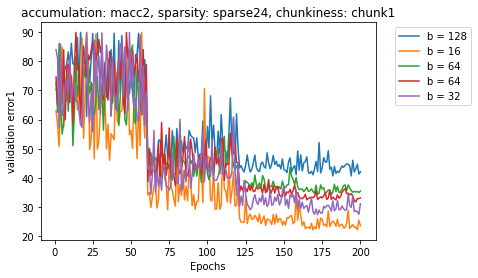

In [148]:

params = {'chunkiness' : "chunk1", 'accumulation' : "macc2", 'sparsity' : "sparse24"}

to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"b = {x.batch}"

compare(to_compare[:], labeler = labeler ,title = title )
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()





macc3,6,6: 9.50%
macc2: 40.66%
macc6,3,6: 10.13%
macc3: 27.34%
macc6: 9.61%
macc5: 9.70%
macc4: 12.51%
macc7: 9.51%
macc1: 50.85%
macc6,6,3: 11.40%


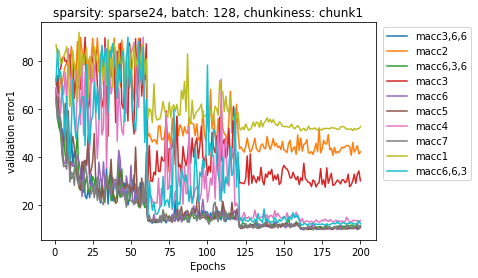

In [143]:
params = {'chunkiness' : "chunk1", 'batch' : 128, 'sparsity' : "sparse24"}

to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"{x.accumulation}"

compare(to_compare[:], labeler = labeler ,title = title )
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()



b = sparse24: 27.34%
b = dense: 19.32%


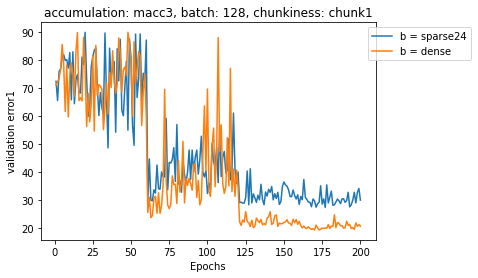

In [154]:

params = {'chunkiness' : "chunk1", 'accumulation' : "macc3", 'batch': 128 }

to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"b = {x.sparsity}"

compare(to_compare[:], labeler = labeler ,title = title )
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()





b = dense: 8.04%


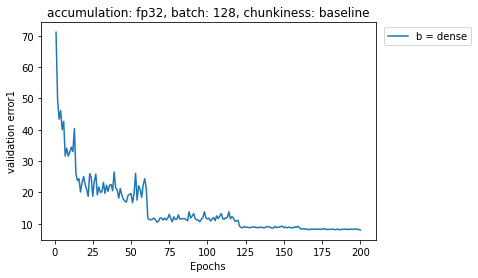

In [158]:

params = {'chunkiness' : "chunk1", 'accumulation' : "fp32", 'batch': 128 }
to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"b = {x.sparsity}"

compare(to_compare[:], labeler = labeler ,title = title)
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()


b = chunk8: 10.10%
b = chunk1: 9.51%


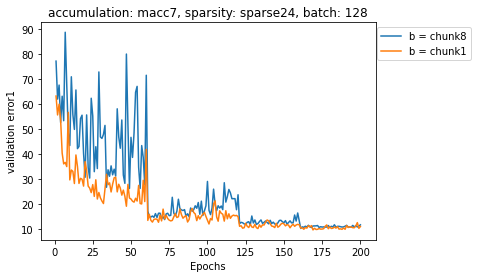

In [162]:

params = {'accumulation' : "macc7", 'batch': 128, 'sparsity': 'sparse24'}
to_compare = [file for file in files if compare_function(file, **params) ]   
title = get_title(**params)
labeler = lambda x: f"b = {x.chunkiness}"

compare(to_compare[:], labeler = labeler ,title = title)
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()


In [13]:
train_plot = tw.Visualizer(train_plot, vis_type='line')
text_vis.show()

<IPython.core.display.Javascript object>

UnpicklingError: could not find MARK